In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

In [2]:
base_filename = os.path.expanduser('~/tmp/plot_data/test4_plot_2')
plot_data_pkl = base_filename + '.pickle'
fontsize=16

### helper functions

In [3]:
def save_plot_pdf(fig,pdf_filename):
    with PdfPages(pdf_filename) as pdf:
        pdf.savefig(fig)

### Load Saved results

In [163]:
with open(plot_data_pkl,'r') as f:
    plot_data = pickle.load(f)

SNRdB_range = plot_data['SNRdB_range']
N = len(SNRdB_range)
estim_stats = plot_data['estim_stats']
counts = np.array([max(estim_stats['detect_count'][i],1) for i in range(N)])

#### Plot Probability of detection

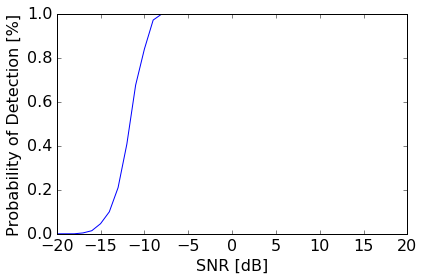

In [164]:
Pdetec = plot_data['Pdetec']
ylabel = 'Probability of Detection [%]'
x_axis_lims = [-20,20]
fname_suffix = '_pdetec'

fig = plt.figure()
plt.plot(SNRdB_range,Pdetec)
plt.xlabel('SNR [dB]',fontsize=fontsize)
plt.ylabel(ylabel,fontsize=fontsize)
plt.xlim(x_axis_lims)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
pdf_filename = base_filename + fname_suffix + '.pdf'
png_filename = base_filename + fname_suffix + '.png'
plt.tight_layout()
save_plot_pdf(fig,pdf_filename)
fig.savefig(png_filename)
plt.show()

#### Plot Probability of False Alarm

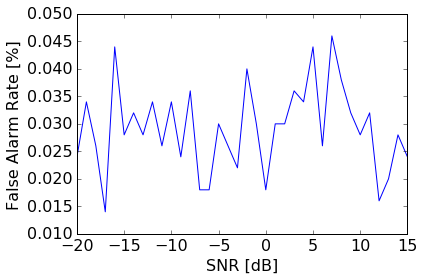

In [165]:
FalseAlarmRate = plot_data['FalseAlarmRate']
ylabel = 'False Alarm Rate [%]'
x_axis_lims = [-20,15]
fname_suffix = '_pfa'

fig = plt.figure()
plt.plot(SNRdB_range,FalseAlarmRate)
plt.xlabel('SNR [dB]',fontsize=fontsize)
plt.ylabel(ylabel,fontsize=fontsize)
plt.xlim(x_axis_lims)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
pdf_filename = base_filename + fname_suffix + '.pdf'
png_filename = base_filename + fname_suffix + '.png'
plt.tight_layout()
#save_plot_pdf(fig,pdf_filename)
#fig.savefig(png_filename)
plt.show()

#### Plot SNR error estimation

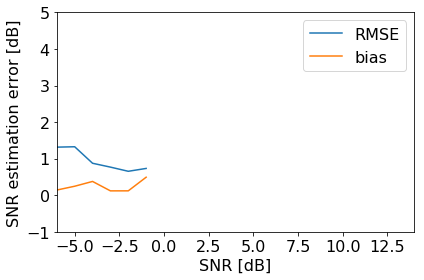

In [46]:
SNRdB_mse = estim_stats['SNRdB']['mse_sum']/counts
SNRdB_bias = estim_stats['SNRdB']['sum']/counts-SNRdB_range
ylabel = 'SNR estimation error [dB]'
x_axis_lims = [-6,14]
y_axis_lims = [-1,5]
fname_suffix = '_rmse_snr'

fig = plt.figure()
plt.plot(SNRdB_range,np.sqrt(SNRdB_mse))
plt.plot(SNRdB_range,SNRdB_bias)
plt.xlabel('SNR [dB]',fontsize=fontsize)
plt.ylabel(ylabel,fontsize=fontsize)
plt.xlim(x_axis_lims)
plt.ylim(y_axis_lims)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
pdf_filename = base_filename + fname_suffix + '.pdf'
png_filename = base_filename + fname_suffix + '.png'
plt.tight_layout()
save_plot_pdf(fig,pdf_filename)
fig.savefig(png_filename)
plt.legend(['RMSE','bias'],fontsize=16)
plt.show()

#### Plot noise floor estimation

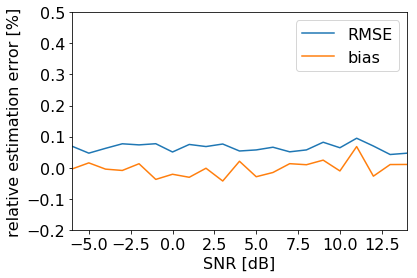

In [17]:
awgn_rmse = np.sqrt(estim_stats['awgn_mag2']['mse_sum']/counts)
awgn_bias = estim_stats['awgn_mag2']['sum']/counts-1
ylabel = 'relative estimation error [%]'
x_axis_lims = [-6,14]
y_axis_lims = [-0.2,0.5]
fname_suffix = '_rmse_awgn'

fig = plt.figure()
plt.plot(SNRdB_range,awgn_rmse)
plt.plot(SNRdB_range,awgn_bias)
plt.xlabel('SNR [dB]',fontsize=fontsize)
plt.ylabel(ylabel,fontsize=fontsize)
plt.xlim(x_axis_lims)
plt.ylim(y_axis_lims)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
pdf_filename = base_filename + fname_suffix + '.pdf'
#save_plot_pdf(fig,pdf_filename)
plt.legend(['RMSE','bias'],fontsize=16)
plt.show()

#### Plot DC offset estimation error

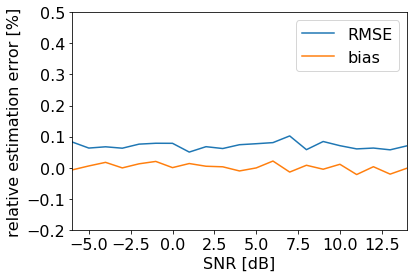

In [18]:
dc_offset = plot_data['dc_offset']
dc_offset_rmse = np.sqrt(estim_stats['dc_offset']['mse_sum']/counts)
dc_offset_bias = estim_stats['dc_offset']['abs_sum']/counts-dc_offset
ylabel = 'relative estimation error [%]'
x_axis_lims = [-6,14]
y_axis_lims = [-0.2,0.5]
fname_suffix = '_rmse_awgn'

fig = plt.figure()
plt.plot(SNRdB_range,dc_offset_rmse)
plt.plot(SNRdB_range,dc_offset_bias)
plt.xlabel('SNR [dB]',fontsize=fontsize)
plt.ylabel(ylabel,fontsize=fontsize)
plt.xlim(x_axis_lims)
plt.ylim(y_axis_lims)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
pdf_filename = base_filename + fname_suffix + '.pdf'
#save_plot_pdf(fig,pdf_filename)
plt.legend(['RMSE','bias'],fontsize=16)
plt.show()

**Conclusion**: Of course it does not depend on the SNR

#### Plot CFO estimation error

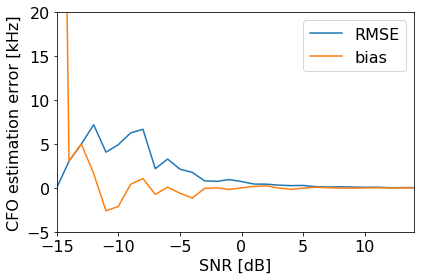

In [21]:
cfo = plot_data['cfo']
scale = 20.0e6/(2*np.pi*1000) # kHz
cfo_rmse = np.sqrt(estim_stats['cfo']['mse_sum']/counts)
cfo_bias = estim_stats['cfo']['sum']/counts-cfo
ylabel = 'CFO estimation error [kHz]'
x_axis_lims = [-15,14]
y_axis_lims = [-5,20]
fname_suffix = '_error_cfo'

fig = plt.figure()
plt.plot(SNRdB_range,cfo_rmse*scale)
plt.plot(SNRdB_range,cfo_bias*scale)
plt.xlabel('SNR [dB]',fontsize=fontsize)
plt.ylabel(ylabel,fontsize=fontsize)
plt.xlim(x_axis_lims)
plt.ylim(y_axis_lims)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
pdf_filename = base_filename + fname_suffix + '.pdf'
png_filename = base_filename + fname_suffix + '.png'
plt.tight_layout()
save_plot_pdf(fig,pdf_filename)
fig.savefig(png_filename)
plt.legend(['RMSE','bias'],fontsize=16)
plt.show()